In [4]:
# Importing the dependency libraries
import numpy as np
import matplotlib.pyplot as plt
import csv


In [27]:
# Instantiate np data
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')


In [118]:
class Linear_Regression:
    def __init__(self) -> None:
        self.w0, self.w1, self.w2, self.w3, self.w4, self.w5 = np.random.randn(), np.random.randn(), np.random.randn(), np.random.randn(), np.random.randn(), np.random.randn()

    def setTrainData(self, x_data, y_data) -> None:
        self.x_data = x_data
        self.y_data = y_data
        if len(x_data) != len(y_data):
            raise ValueError(f"x_data and y_data must have the same length\ncurrent lengths: x_data = {len(x_data)}, y_data = {len(y_data)}")
        self.training_examples = len(x_data)

    def plotData(self) -> None:
        plt.scatter(self.x_data, self.y_data)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('train')
        plt.show()

    def hypothesis(self, x) -> float:
        return self.w0 + self.w1 * x + self.w2 * x**2 + self.w3 * x**3 + self.w4 * x**4 + self.w5 * x**5

    def gradient_descent(self, learning_rate: float, iterations: int) -> None:
        for _ in range(iterations):
            w0_gradient, w1_gradient, w2_gradient, w3_gradient, w4_gradient, w5_gradient = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
            for i in range(self.training_examples):
                x = self.x_data[i]
                y = self.y_data[i]
                
                y_pred = self.hypothesis(x)
                error = y_pred - y
                
                w0_gradient += error
                w1_gradient += error * x
                w2_gradient += error * x**2
                w3_gradient += error * x**3
                w4_gradient += error * x**4
                w5_gradient += error * x**5
                
            self.w0 -= (learning_rate / self.training_examples) * w0_gradient
            self.w1 -= (learning_rate / self.training_examples) * w1_gradient
            self.w2 -= (learning_rate / self.training_examples) * w2_gradient
            self.w3 -= (learning_rate / self.training_examples) * w3_gradient
            self.w4 -= (learning_rate / self.training_examples) * w4_gradient
            self.w5 -= (learning_rate / self.training_examples) * w5_gradient

    def test_model(self) -> None:
        total_error = 0
        test_examples = len(self.x_data)
        
        x_predictions = []
        y_predictions = []
        
        for i in range(test_examples):
            y_pred = self.hypothesis(self.x_data[i])
            y_true = self.y_data[i]
            
            x_predictions.append(self.x_data[i])
            y_predictions.append(y_pred)
            
            total_error += (y_true - y_pred) ** 2  # Squared error

        mse = total_error / test_examples  # Mean squared error
        normalized_mse = mse / (np.mean(self.y_data) ** 2)  # Normalized mean squared error
        print(f"Normalized Mean Squared Error: {normalized_mse:.4f}")
        
        plt.scatter(self.x_data, self.y_data)
        plt.title('Train Data')
        plt.show()
        
        plt.scatter(x_predictions, y_predictions)
        plt.title('Predictions')
        plt.show()
        

Starting weights:  0.5921986964977629 -0.04867524274098236 0.4648296456838539 0.03841609159467691 1.8478348116901326 0.31141940184410377
Ending weights:  3.039474089507204 3.02532781747148 0.866988274884614 1.9621746969574814 1.9876766932126029 1.731004383161906
The equation is: y = 3.039474089507204 + 3.02532781747148 * x + 0.866988274884614 * x^2 + 1.9621746969574814 * x^3 + 1.9876766932126029 * x^4 + 1.731004383161906 * x^5
Normalized Mean Squared Error: 0.7703


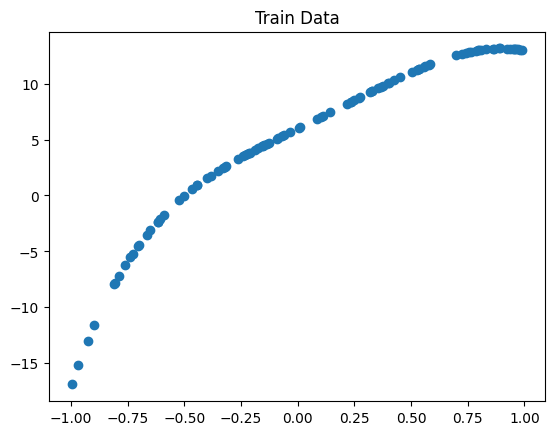

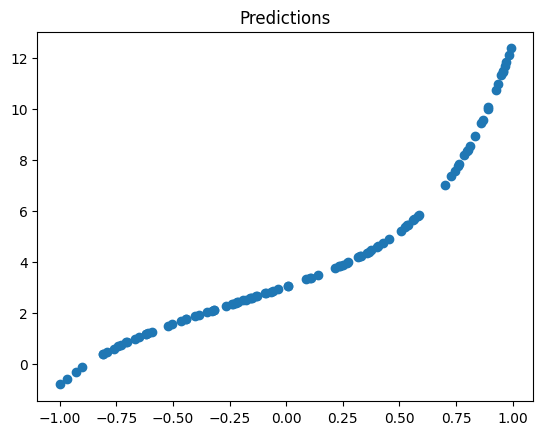

In [120]:
# The plotted image above looks very similar to an x^3 function.
# Therefore I will modify my linear regression equation in the Linear Regression Class to be Polynomial
question_one = Linear_Regression()
question_one.setTrainData(x_train, y_train)


print("Starting weights: ", question_one.w0, question_one.w1, question_one.w2, question_one.w3, question_one.w4, question_one.w5)
question_one.gradient_descent(learning_rate=0.0001, iterations=10000)
print("Ending weights: ", question_one.w0, question_one.w1, question_one.w2, question_one.w3, question_one.w4, question_one.w5)
print(f"The equation is: y = {question_one.w0} + {question_one.w1} * x + {question_one.w2} * x^2 + {question_one.w3} * x^3 + {question_one.w4} * x^4 + {question_one.w5} * x^5")

question_one.test_model()